In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.6.2'

In [4]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory(r"C:\Users\rumjhum\Desktop\Dogs and Cats Classification\train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"C:\Users\rumjhum\Desktop\Dogs and Cats Classification\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [8]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [9]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [11]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
18/18 [==============================] - 5s 243ms/step - loss: 1.0245 - accuracy: 0.0000e+00 - val_loss: 1.0216 - val_accuracy: 0.0000e+00
Epoch 2/15
18/18 [==============================] - 3s 190ms/step - loss: 1.0202 - accuracy: 0.0000e+00 - val_loss: 1.0177 - val_accuracy: 0.0000e+00
Epoch 3/15
18/18 [==============================] - 4s 238ms/step - loss: 1.0166 - accuracy: 0.0000e+00 - val_loss: 1.0145 - val_accuracy: 0.0000e+00
Epoch 4/15
18/18 [==============================] - 4s 212ms/step - loss: 1.0137 - accuracy: 0.0000e+00 - val_loss: 1.0121 - val_accuracy: 0.0000e+00
Epoch 5/15
18/18 [==============================] - 4s 198ms/step - loss: 1.0116 - accuracy: 0.0000e+00 - val_loss: 1.0101 - val_accuracy: 0.0000e+00
Epoch 6/15
18/18 [==============================] - 4s 203ms/step - loss: 1.0099 - accuracy: 0.0000e+00 - val_loss: 1.0086 - val_accuracy: 0.0000e+00
Epoch 7/15
18/18 [==============================] - 4s 213ms/step - loss: 1.0085 - accuracy: 0.0000e

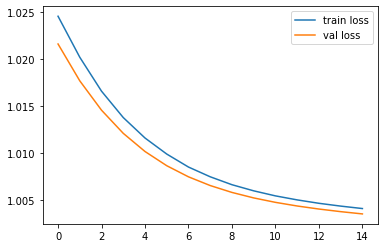

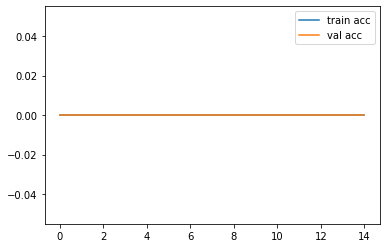

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [14]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [17]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\rumjhum\Desktop\Dogs and Cats Classification\test\dogs\dog_43.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [18]:
result

array([[0.24962197, 0.24967659, 0.249589  , 0.25111246]], dtype=float32)

In [19]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\rumjhum\Desktop\Dogs and Cats Classification\test\cats\cat_56.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [20]:
result

array([[0.24955143, 0.2496162 , 0.24951233, 0.25132006]], dtype=float32)

In [22]:
if (result[0] < 0).all():  # Use .all() if you want all elements to satisfy the condition
    print("The image classified is Cat")
else:
    print("The image classified is Dog")

The image classified is Dog


In [23]:
# Preprocess the image
def preprocess_image(img_path):
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image) / 255.0
    test_image = np.expand_dims(test_image, axis=0)
    return test_image

# Preprocess and predict
test_image = preprocess_image("C:\Users\rumjhum\Desktop\Dogs and Cats Classification\test")
result = model.predict(test_image)

# Interpret the result
predicted_label = "Dog 🐶" if result[0][0] >= 0.5 else "Cat 🐱"
st.success(f"The image is classified as **{predicted_label}**")


NameError: name 'file_path' is not defined